# Import essential library 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
#Data loading
train_data = pd.read_csv('/kaggle/input/sfb-training-test/training_set.csv')
test_data = pd.read_csv('/kaggle/input/sfb-training-test/testing_set.csv')

In [3]:
#Check data

train_data.head()

,Day,Month,Year,MODIS_B01,MODIS_B02,MODIS_B03,MODIS_B04,MODIS_B05,MODIS_B06,MODIS_B07,Salinity
0,2006,11,2006,0.033225,0.033225,0.033225,0.033225,0.033225,0.045671,0.033225,27.55
1,2011,10,2011,0.000000,0.000000,0.000000,0.000000,0.000000,0.006454,0.000000,27.69
2,2014,6,2014,0.014285,0.014285,0.014285,0.014285,0.014285,0.015042,0.014285,30.91
3,2015,3,2015,0.011038,0.083436,0.011038,0.011038,0.038958,0.094582,0.011038,27.86
4,2012,12,2012,0.008225,0.014826,0.012445,0.008225,0.014068,0.039608,0.008225,28.40


In [4]:
train_data.shape

(5451, 11)

In [5]:
#Check data

test_data.head()

,Day,Month,Year,MODIS_B01,MODIS_B02,MODIS_B03,MODIS_B04,MODIS_B05,MODIS_B06,MODIS_B07,Salinity
0,2007,10,2007,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,31.57
1,2010,10,2010,0.025649,0.025649,0.025649,0.025649,0.025649,0.072186,0.025649,29.53
2,2003,4,2003,0.084301,0.084301,0.084301,0.084301,0.084301,0.207236,0.084301,27.36
3,2009,6,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.025172,0.000000,28.74
4,2010,10,2010,0.000000,0.013311,0.000000,0.000000,0.000000,0.082570,0.000000,30.75


In [6]:
test_data.shape

(1363, 11)

# Model Development

In [7]:
target = 'Salinity'
feature = ['Day','Month', 'Year', 'MODIS_B01', 'MODIS_B02', 'MODIS_B03', 'MODIS_B04', 'MODIS_B05', 'MODIS_B06', 'MODIS_B07']
#Establish X_train, y_train, X_test, y_test
X_train = train_data[feature]  
y_train = train_data[target]  
X_test = test_data[feature]  # Your features
y_test = test_data[target] 

In [8]:
param_grid = {
    'max_depth': [10,15,20],  # Shallower trees to reduce complexity
    'min_samples_split': [50,75,100],  # Increase to avoid overly fine splits
    'min_samples_leaf': [30,35],  # Increase to ensure more samples at each leaf
    'max_features': ['sqrt', 'log2'],  # Restrict the number of features per split
    'ccp_alpha': [0.01, 0.05, 0.1]  # Add cost-complexity pruning to reduce complexity
}

In [9]:
# Initialize DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

In [10]:
# Perform grid search with cross-validation to tune the hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END ccp_alpha=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV] END ccp_alpha=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV] END ccp_alpha=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV] END ccp_alpha=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV] END ccp_alpha=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV] END ccp_alpha=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV] END ccp_alpha=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV] END ccp_alpha=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=30, min_samples_spli

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'ccp_alpha': [0.01, 0.05, 0.1],
                         'max_depth': [10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [30, 35],
                         'min_samples_split': [50, 75, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [11]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 50}


In [12]:
# Train the best Decision Tree model with the best hyperparameters
best_dt = grid_search.best_estimator_

In [13]:
# Make predictions
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

In [14]:
# Define a function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if not np.any(y_true == 0) else np.nan
    return rmse, mae, r2, mape

In [15]:
# Calculate metrics for training and testing sets
train_rmse, train_mae, train_r2, train_mape = calculate_metrics(y_train, y_train_pred)
test_rmse, test_mae, test_r2, test_mape = calculate_metrics(y_test, y_test_pred)

In [16]:
# Print the evaluation metrics
print("\nTraining Metrics:")
print(f"  RMSE: {train_rmse}")
print(f"  MAE: {train_mae}")
print(f"  R-squared: {train_r2}")
print(f"  MAPE: {train_mape:.2f}%")

print("\nTesting Metrics:")
print(f"  RMSE: {test_rmse}")
print(f"  MAE: {test_mae}")
print(f"  R-squared: {test_r2}")
print(f"  MAPE: {test_mape:.2f}%")


Training Metrics:
  RMSE: 2.478279798781356
  MAE: 1.7847229559901234
  R-squared: 0.5941908241902072
  MAPE: 7.30%

Testing Metrics:
  RMSE: 2.5261055364661527
  MAE: 1.8494237165403093
  R-squared: 0.5835792315565287
  MAPE: 7.48%


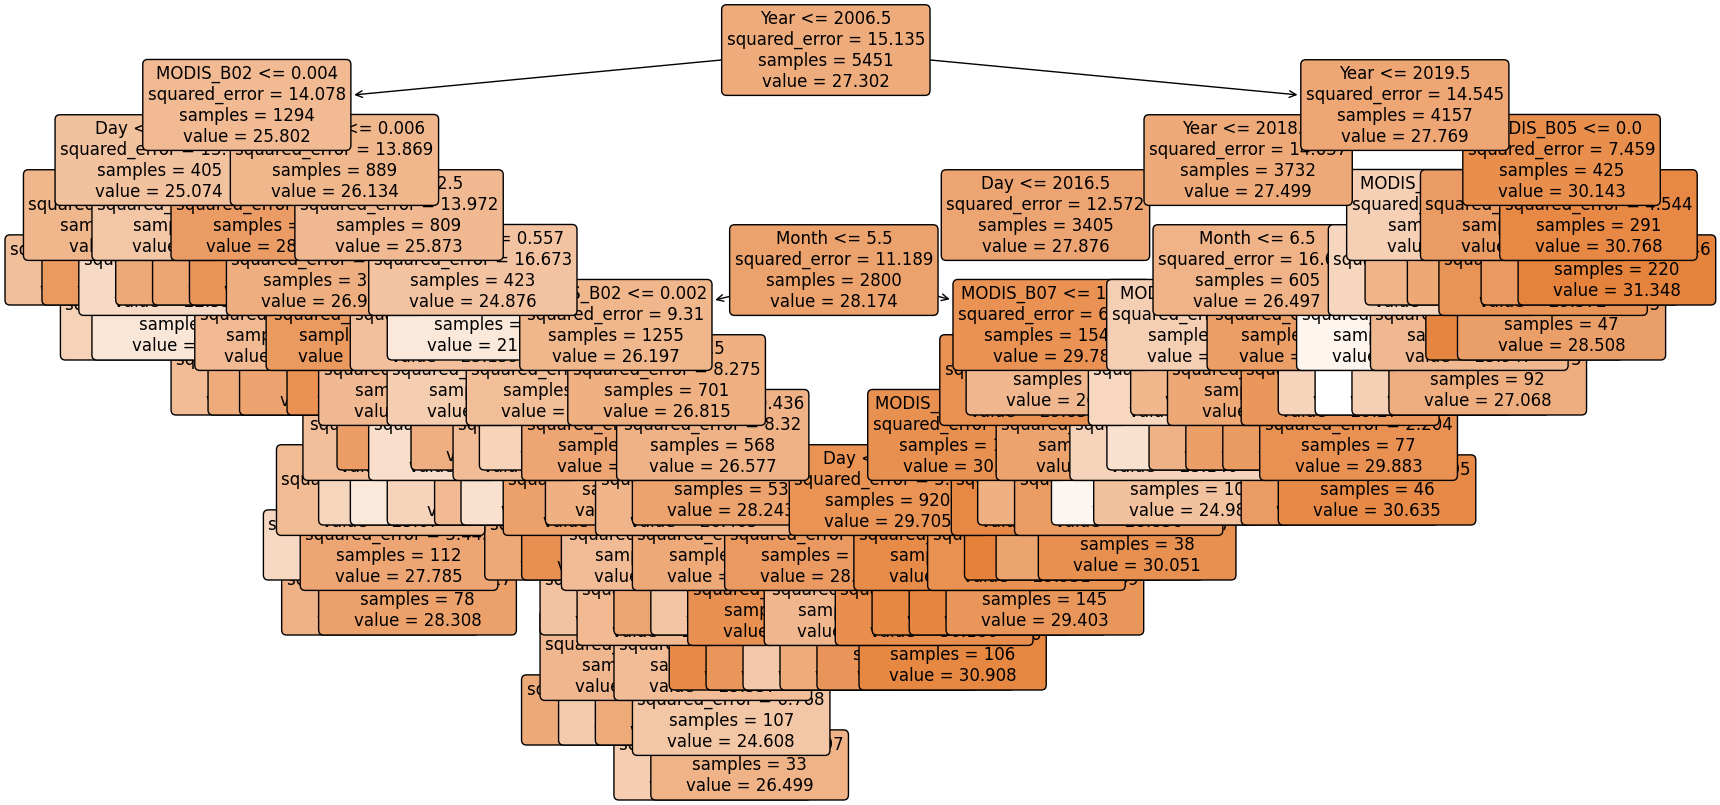

In [17]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=X_train.columns, class_names=['Salinity'], rounded=True, fontsize=12)
plt.show()